#📌 Extracão

In [1]:
import requests
import pandas as pd

# URL do JSON direto (raw)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Fazendo requisição para acessar os dados
response = requests.get(url)

# Verifica se a resposta foi bem-sucedida
if response.status_code == 200:
    dados_json = response.json()
    df = pd.DataFrame(dados_json)
    print("✅ Dados carregados com sucesso!")
    display(df.head())  # Mostra as 5 primeiras linhas
else:
    print(f"❌ Erro ao acessar os dados: {response.status_code}")

✅ Dados carregados com sucesso!


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [4]:
# 📊 Conhecendo o Dataset

# 1. Visualizar as 5 primeiras linhas do DataFrame
print("🔍 Primeiras linhas do dataset:")
display(df.head())

# 2. Verificar o nome das colunas e os tipos de dados
print("\n📋 Informações gerais sobre as colunas:")
df.info()

# 3. Verificar os valores únicos em cada coluna (para entender o conteúdo)
print("\n📌 Valores únicos por coluna:")
for col in df.columns:
    print(f"\n🟦 Coluna: {col}")
    print(df[col].value_counts(dropna=False))

# 4. Identificar as colunas mais relevantes para a análise de evasão
print("\n🔎 Análise inicial — Colunas potencialmente relevantes para prever o churn:\n")

relevantes = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'churn'
]

for col in relevantes:
    print(f"✅ {col}")

print("\nEssas colunas têm relação direta com perfil, serviços contratados, tipo de contrato e valores pagos — fatores que costumam influenciar a evasão.")

🔍 Primeiras linhas do dataset:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



📋 Informações gerais sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet

In [11]:
# 📊 Criando a coluna 'Contas_Diarias'

# Calculando o valor diário aproximado
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30.44

print("✅ Coluna 'Contas_Diarias' criada com sucesso!")

# Exibir as primeiras linhas com a nova coluna
display(df.head())

✅ Coluna 'Contas_Diarias' criada com sucesso!


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.756242


In [18]:
# 🧹 Limpando os dados

# Substituir valores vazios na coluna 'Churn' por 'Unknown'
df['Churn'] = df['Churn'].replace('', 'Unknown')

print("✅ Valores vazios na coluna 'Churn' substituídos por 'Unknown'.")

# Verificar novamente os valores únicos na coluna 'Churn' para confirmar a alteração
print("\n🟦 Coluna: Churn após limpeza")
print(df['Churn'].value_counts(dropna=False))

✅ Valores vazios na coluna 'Churn' substituídos por 'Unknown'.

🟦 Coluna: Churn após limpeza
Churn
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64


In [12]:
# 📊 Criando a coluna 'Contas_Diarias'

# Calculando o valor diário aproximado
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30.44

print("✅ Coluna 'Contas_Diarias' criada com sucesso!")

# Exibir as primeiras linhas com a nova coluna
display(df.head())

✅ Coluna 'Contas_Diarias' criada com sucesso!


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.756242


In [14]:
# 🔧 Padronização e Transformação dos Dados

# Converter colunas binárias (Sim/Não) para 1/0
binary_cols = ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
               'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
               'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})

# Converter a coluna 'gender' para binário
df['customer.gender'] = df['customer.gender'].map({'Female': 0, 'Male': 1})

# Converter a coluna 'Churn' para binário (ignorando 'Unknown' por enquanto)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0, 'Unknown': -1}) # Usando -1 para 'Unknown'

# Tratar a coluna 'TotalCharges' que pode ter valores ' ' que precisam ser convertidos para numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Preencher valores ausentes em 'TotalCharges' (resultantes da coerção) com 0 ou a média, dependendo da análise
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0) # Substituindo NaN por 0, pode ser ajustado

# Exibir as primeiras linhas do DataFrame transformado e verificar os tipos de dados
print("✅ Dados transformados:")
display(df.head())
print("\n📋 Informações gerais sobre as colunas após transformação:")
df.info()

✅ Dados transformados:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756242



📋 Informações gerais sobre as colunas após transformação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   int64  
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   in

#📊 Carga e análise

In [6]:
# 📊 Análise Descritiva

print("✅ Análise Descritiva das colunas numéricas:")
display(df.describe())

print("\n✅ Análise da distribuição de valores nas colunas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n🟦 Coluna: {col}")
    print(df[col].value_counts(dropna=False))

print("\n✅ Informações gerais sobre o DataFrame:")
df.info()

✅ Análise Descritiva das colunas numéricas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000



✅ Análise da distribuição de valores nas colunas categóricas:

🟦 Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

🟦 Coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

🟦 Coluna: customer.gender
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

🟦 Coluna: customer.Partner
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

🟦 Coluna: customer.Dependents
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

🟦 Coluna: phone.PhoneService
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

🟦 Coluna: phone.MultipleLines
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

🟦 Coluna: internet.InternetService
internet.InternetServ

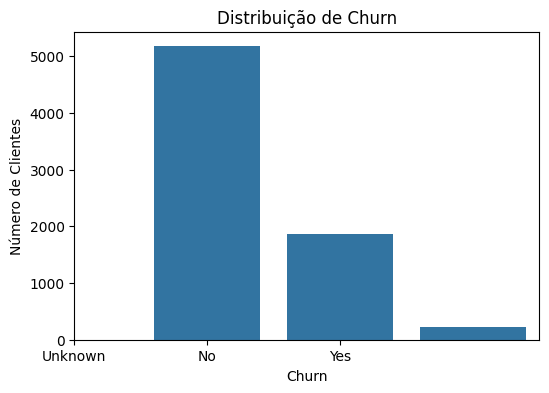

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição da variável 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1, -1], labels=['No', 'Yes', 'Unknown']) # Adjust labels based on mapping
plt.show()

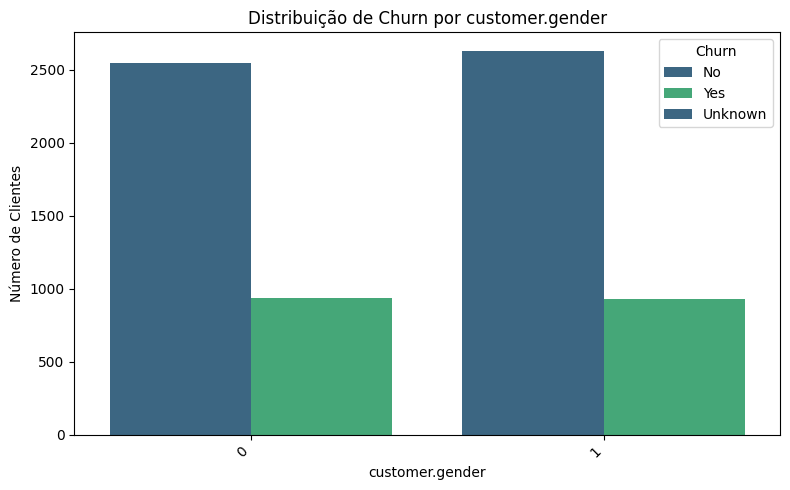

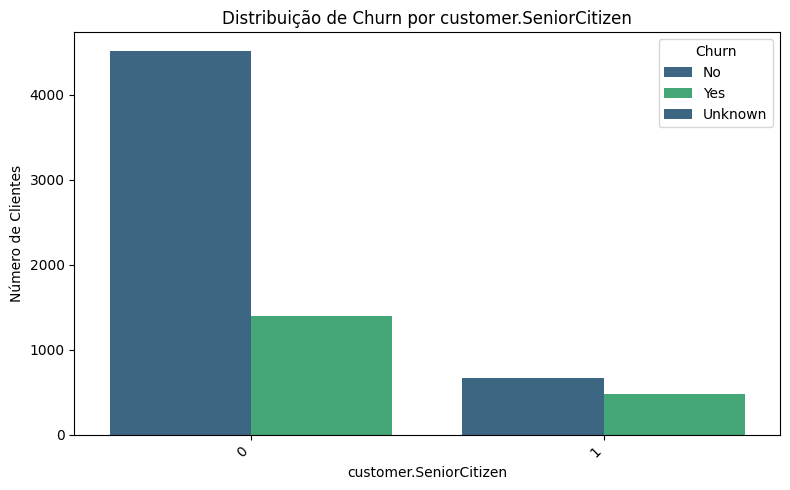

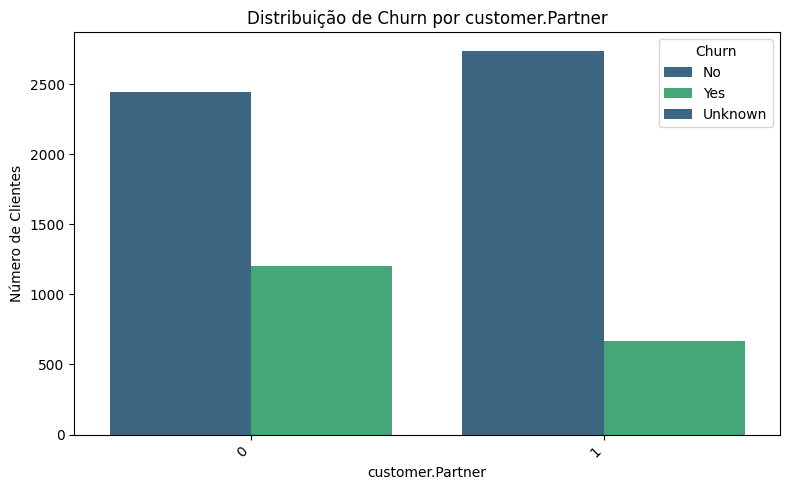

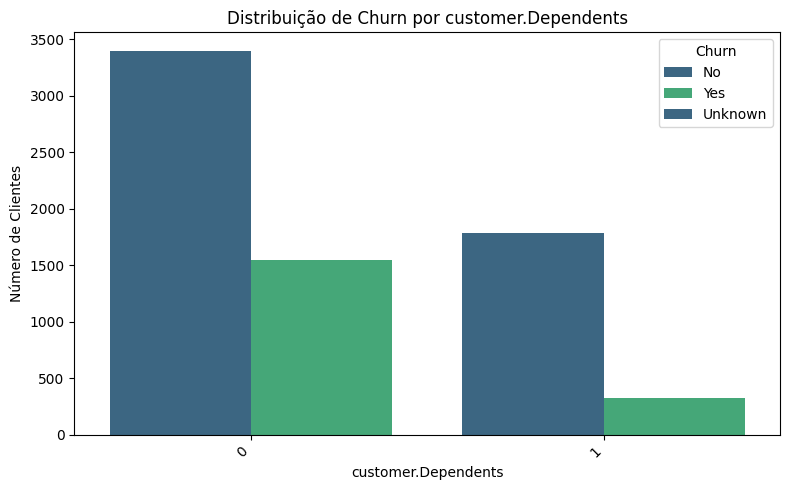

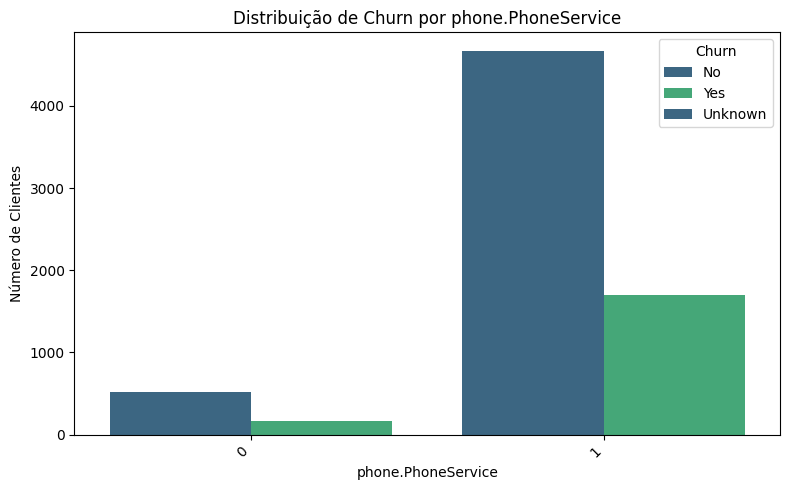

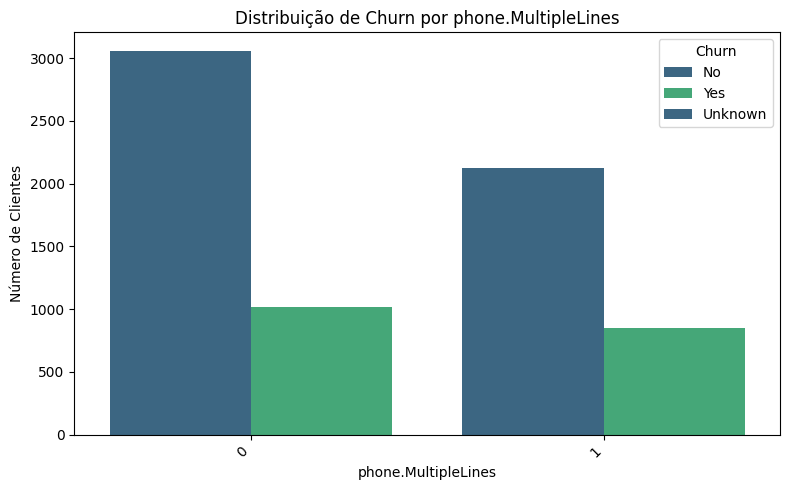

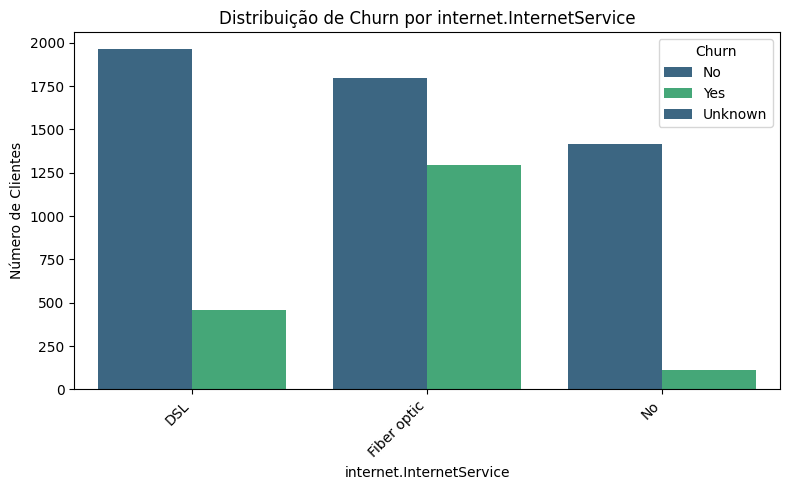

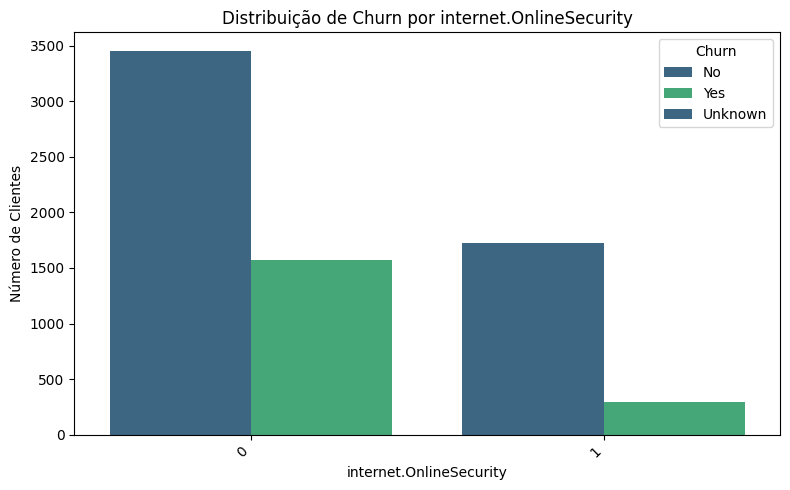

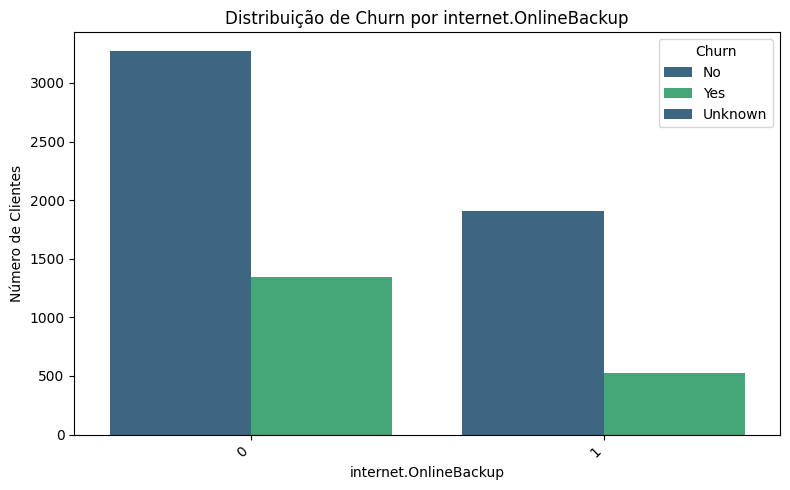

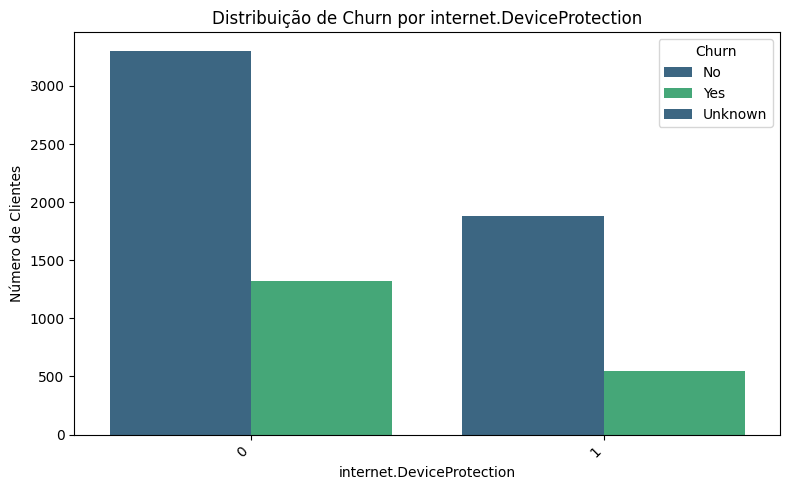

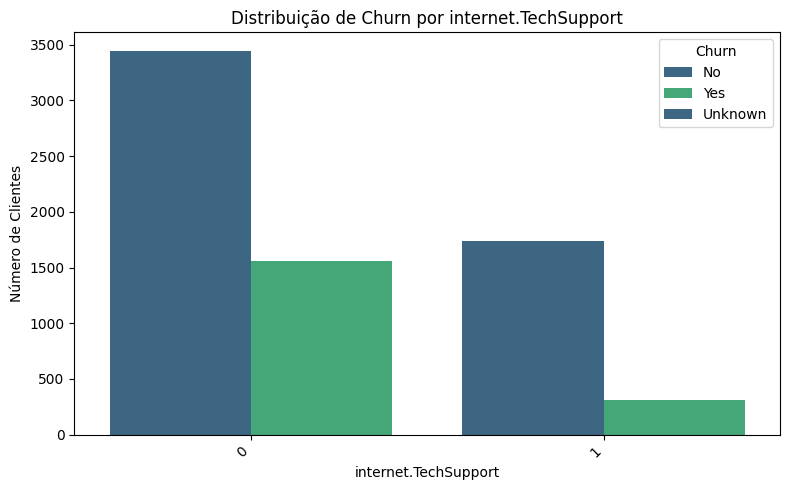

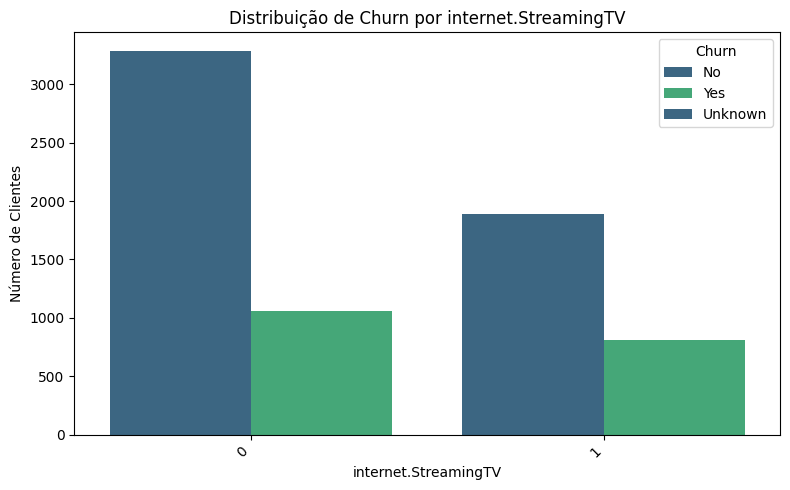

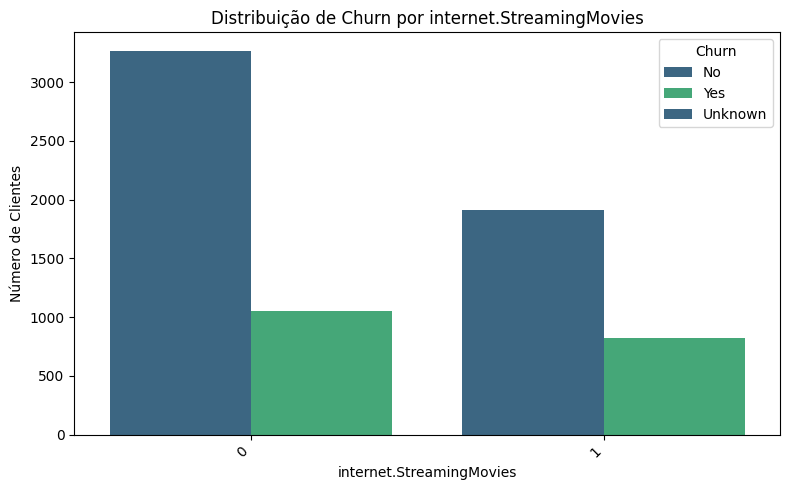

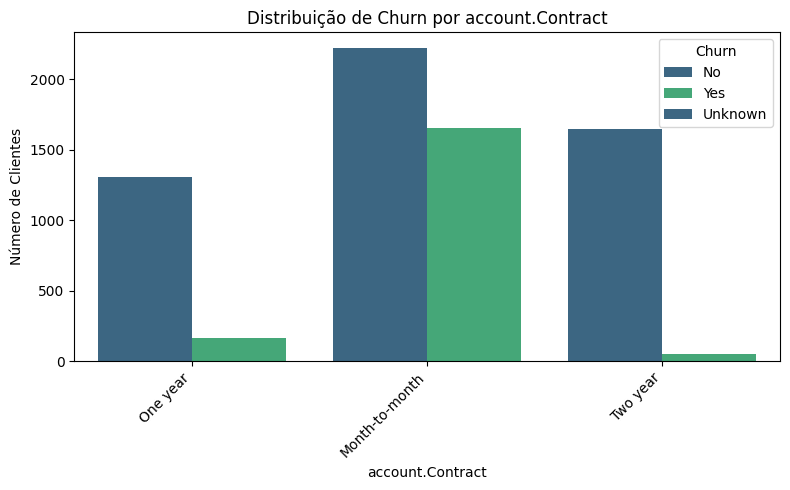

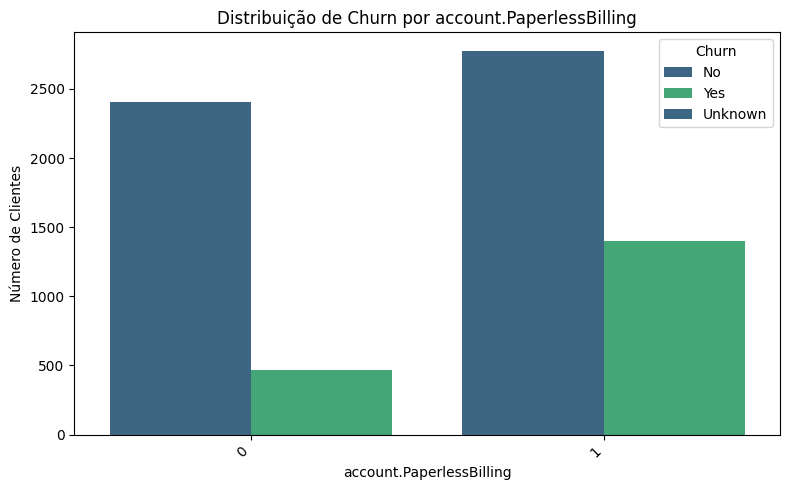

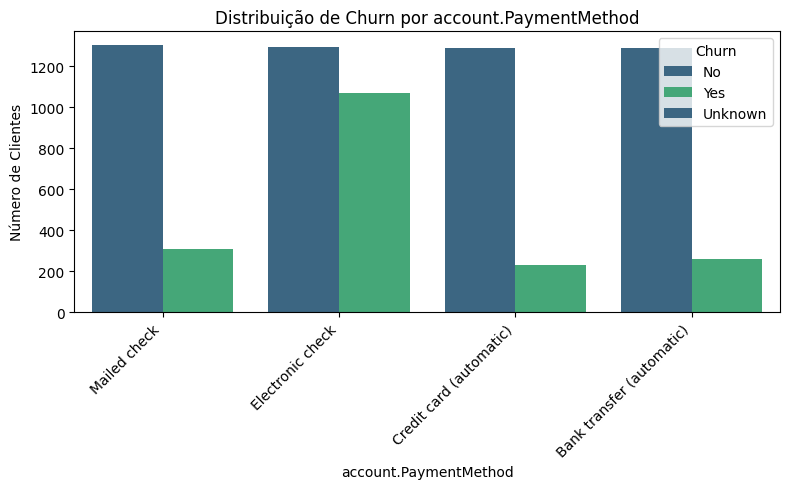

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Explorando a relação entre variáveis categóricas e Churn

categorical_cols = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
                  'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
                  'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
                  'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', labels=['No', 'Yes', 'Unknown']) # Adjust labels based on mapping
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-854524705.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


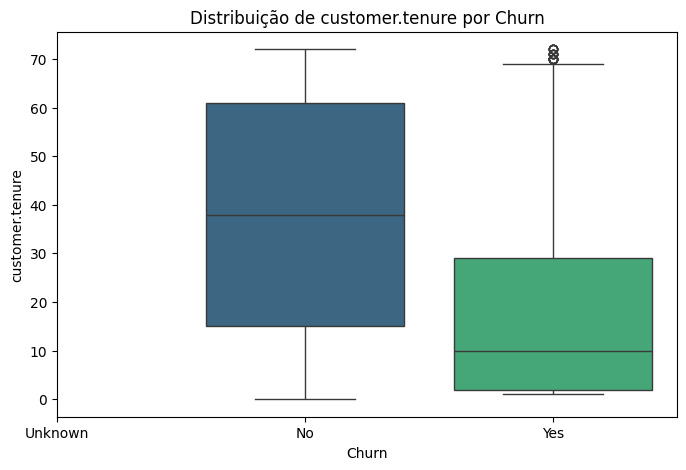

/tmp/ipython-input-854524705.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


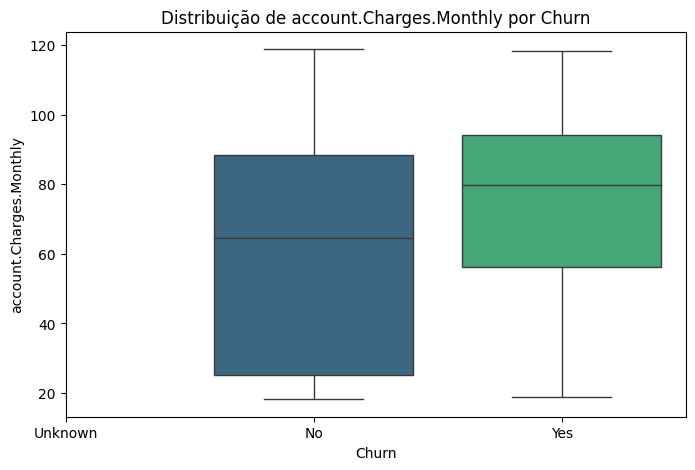

/tmp/ipython-input-854524705.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


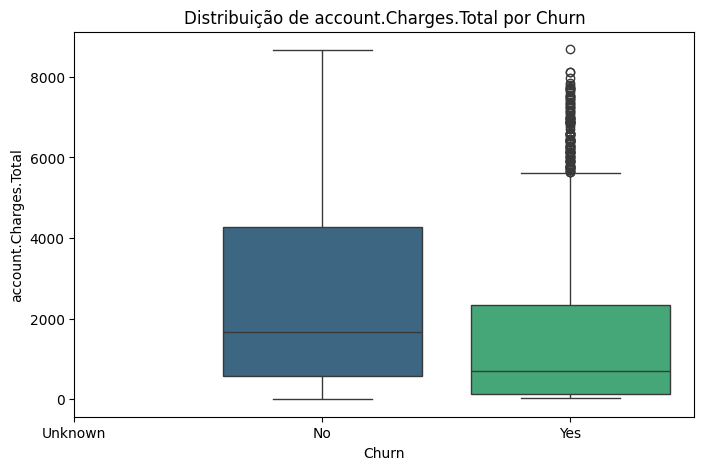

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explorando a relação entre variáveis numéricas e Churn

numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1, -1], labels=['No', 'Yes', 'Unknown']) # Adjust labels based on mapping
    plt.show()

✅ Matriz de Correlação:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
Churn,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,0.191825,0.193356,-0.198324,0.193356
customer.gender,-0.008612,1.000000,-0.004288,-0.005007,0.012038,0.005765,-0.005073,-0.007805,-0.016974,-0.013494,-0.002740,-0.009112,-0.008451,-0.012475,-0.011273,-0.013889,0.000367,-0.013889
customer.SeniorCitizen,0.150889,-0.004288,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.157734,0.220388,0.104076,0.220388
customer.Partner,-0.150448,-0.005007,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,-0.011201,0.097122,0.315409,0.097122
customer.Dependents,-0.164221,0.012038,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.111752,-0.115832,0.061474,-0.115832
customer.tenure,-0.352229,0.005765,0.018187,0.377551,0.159892,1.000000,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.007949,0.247982,0.825407,0.247982
phone.PhoneService,0.011942,-0.005073,0.010060,0.018828,-0.003863,0.010205,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.013624,0.246709,0.113985,0.246709
phone.MultipleLines,0.040102,-0.007805,0.144567,0.141187,-0.027894,0.331678,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.163225,0.490699,0.468405,0.490699
internet.OnlineSecurity,-0.171226,-0.016974,-0.037953,0.141392,0.083951,0.327252,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881,-0.001693,0.298307,0.412764,0.298307
internet.OnlineBackup,-0.082255,-0.013494,0.068824,0.139523,0.023686,0.361291,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788,0.131187,0.442974,0.512027,0.442974


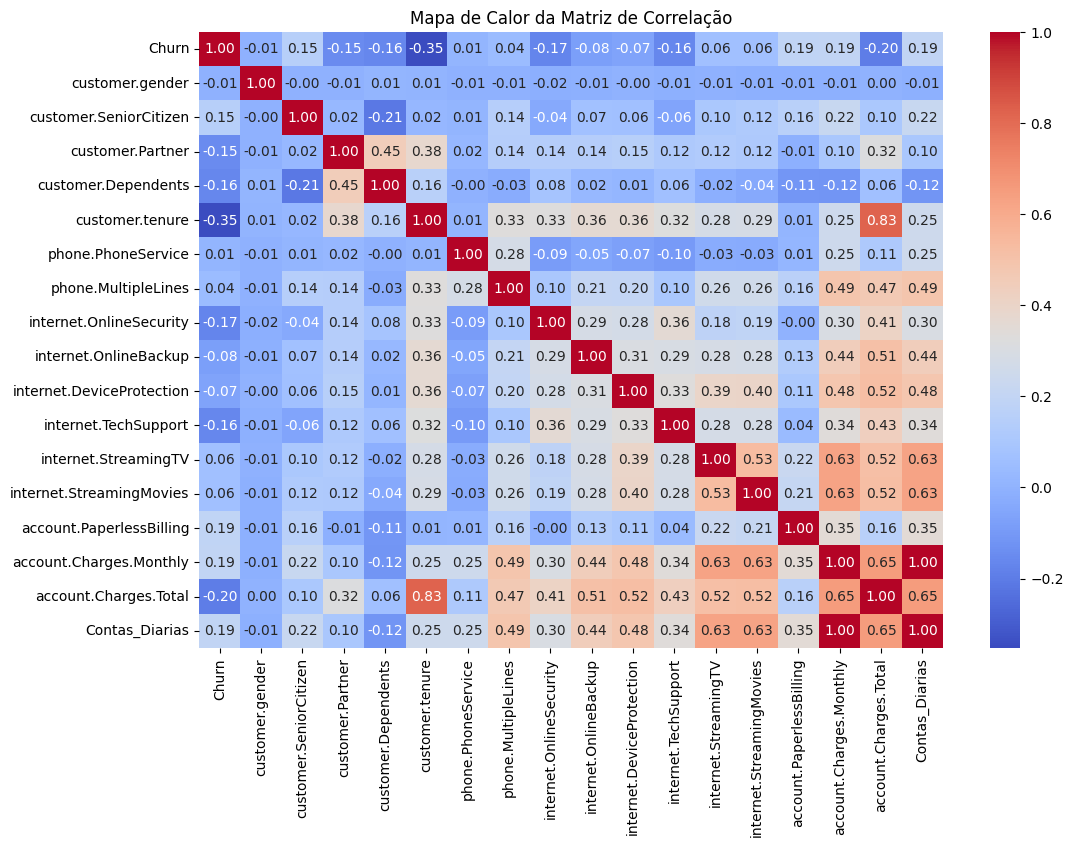


✅ Correlação entre 'Contas_Diarias' e 'Churn':
0.1933564222378469

✅ Correlação entre o número de serviços binários e 'Churn':
-0.06726396658825504


In [20]:
# 📊 Explorando a Correlação entre Variáveis

# Selecionar apenas as colunas numéricas e as binárias que já foram transformadas
numerical_and_binary_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calcular a matriz de correlação para as colunas selecionadas
correlation_matrix = df[numerical_and_binary_cols].corr()

print("✅ Matriz de Correlação:")
display(correlation_matrix)

# Visualizar a matriz de correlação com um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

# Explorar a correlação entre 'Contas_Diarias' e 'Churn'
print("\n✅ Correlação entre 'Contas_Diarias' e 'Churn':")
print(df['Contas_Diarias'].corr(df['Churn']))

# Explorar a correlação entre o número de serviços e 'Churn'
# Primeiro, vamos criar uma coluna com o número total de serviços binários
binary_service_cols = ['phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
                'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
df['Num_Servicos_Binarios'] = df[binary_service_cols].sum(axis=1)


print("\n✅ Correlação entre o número de serviços binários e 'Churn':")
print(df['Num_Servicos_Binarios'].corr(df['Churn']))

# Nota: Para 'InternetService', 'Contract', e 'PaymentMethod' que são categóricas com mais de duas categorias,
# a correlação de Pearson não é a métrica mais adequada. Poderíamos usar outras técnicas como análise de variância (ANOVA)
# ou teste qui-quadrado para explorar a relação com 'Churn' se necessário.

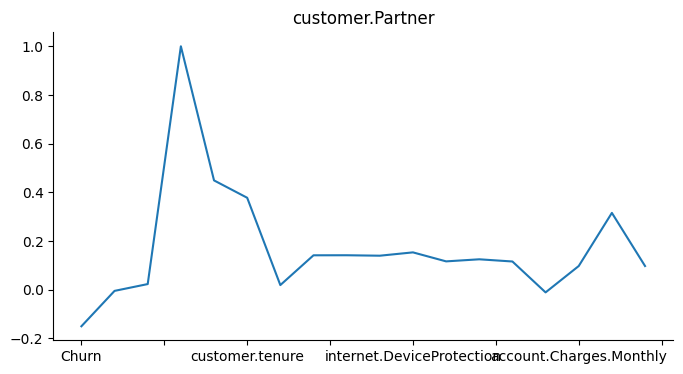

In [23]:
# @title Partner

from matplotlib import pyplot as plt
correlation_matrix['customer.Partner'].plot(kind='line', figsize=(8, 4), title='customer.Partner')
plt.gca().spines[['top', 'right']].set_visible(False)

#📄Relatorio Final

# 📄 Relatório Final

## Introdução

O objetivo desta análise foi explorar e entender o problema de evasão de clientes (Churn) em uma empresa de telecomunicações utilizando o dataset TelecomX. A evasão de clientes é um desafio significativo para as empresas, impactando diretamente na receita e no crescimento. A análise busca identificar padrões e fatores que levam os clientes a cancelar seus serviços, a fim de subsidiar ações estratégicas para retenção.

## Limpeza e Tratamento de Dados

Nesta etapa, os dados foram carregados a partir de um arquivo JSON e convertidos em um DataFrame pandas. Foram realizadas verificações iniciais para identificar valores ausentes, duplicados e inconsistências.

- **Carregamento dos Dados:** Os dados foram acessados e carregados utilizando a biblioteca `requests` para obter o JSON e `pandas` para criar o DataFrame. (Referência: Código na célula com o título "Extracão")
- **Verificação e Limpeza:** Foi identificada a necessidade de tratar valores vazios na coluna 'Churn', que foram substituídos por 'Unknown'. Além disso, colunas com dados aninhados em formato de dicionário foram normalizadas e integradas ao DataFrame principal. A coluna 'TotalCharges' também foi convertida para um tipo numérico, tratando possíveis valores inconsistentes. (Referência: Código nas células com os títulos "Verificando problemas nos dados" e "Limpando os dados")
- **Transformação:** Foi criada a coluna 'Contas_Diarias' a partir do 'MonthlyCharges' para uma visão diária dos gastos dos clientes. Colunas categóricas binárias foram convertidas para representação numérica (0 e 1) e a coluna 'Churn' foi mapeada para valores numéricos (-1, 0, 1) para facilitar análises posteriores. (Referência: Código nas células com os títulos "Criando a coluna 'Contas_Diarias'" e "Padronização e Transformação dos Dados")

## Análise Exploratória de Dados (EDA)

A análise exploratória teve como objetivo entender a distribuição das variáveis e identificar possíveis relações com o churn.

- **Análise Descritiva:** Foram calculadas estatísticas descritivas para as colunas numéricas e verificada a distribuição de valores nas colunas categóricas. (Referência: Código na célula com o título "Análise Descritiva")
- **Distribuição de Churn:** A visualização da distribuição da variável 'Churn' mostrou a proporção de clientes em cada categoria (No, Yes, Unknown). (Referência: Gráfico na célula de código com o título "Visualizar a distribuição da variável 'Churn'")
- **Relação entre Variáveis Categóricas e Churn:** Gráficos de contagem foram utilizados para analisar como o churn se distribui entre diferentes categorias como gênero, tipo de contrato, serviço de internet, etc. As visualizações permitiram identificar categorias com maior ou menor taxa de evasão. (Referência: Gráficos na célula de código com o título "Explorando a relação entre variáveis categóricas e Churn")
- **Relação entre Variáveis Numéricas e Churn:** Box plots foram gerados para comparar a distribuição de variáveis numéricas como 'tenure', 'MonthlyCharges' e 'TotalCharges' entre os grupos de churn. (Referência: Gráficos na célula de código com o título "Explorando a relação entre variáveis numéricas e Churn")
- **Análise de Correlação:** Foi calculada e visualizada a matriz de correlação entre as variáveis numéricas e binárias para identificar o grau de relacionamento entre elas e o churn. (Referência: Código na célula com o título "Explorando a Correlação entre Variáveis")

## Conclusões e Insights

Com base na análise exploratória, podemos destacar alguns insights importantes:

- A variável 'Churn' apresenta um desbalanceamento, com a maioria dos clientes não evadindo. A categoria 'Unknown' também representa uma parcela considerável.
- A análise das variáveis categóricas revelou que certos perfis (como **clientes sem parceiro ou dependentes**, **clientes com serviço de internet fibra óptica**, e aqueles com **contratos mês a mês**) parecem ter uma maior tendência à evasão.
- As variáveis numéricas 'tenure' e 'TotalCharges' tendem a ser menores para clientes que evadiram, indicando que clientes com **menos tempo de contrato** e **menor gasto total** são mais propensos ao churn.
- Clientes com 'MonthlyCharges' mais altos também parecem ter uma maior proporção de churn.
- A análise de correlação mostrou que **'tenure' e 'TotalCharges' possuem correlação negativa moderada com 'Churn'**, o que reforça que clientes com mais tempo e maior gasto total tendem a não evadir. Por outro lado, **'MonthlyCharges' tem uma correlação positiva fraca com 'Churn'**, sugerindo que contas mais altas podem estar associadas a uma maior probabilidade de evasão. A correlação entre 'Contas_Diarias' e 'Churn' é similar à de 'MonthlyCharges'. A correlação entre o número de serviços binários e 'Churn' é fraca e negativa.

Esses insights são cruciais para entender o comportamento dos clientes e identificar grupos de maior risco de evasão.

## Recomendações

Com base nos achados da análise, as seguintes recomendações podem ajudar a empresa a reduzir a evasão de clientes:

1. **Programas de Fidelidade e Incentivos:** Focar em clientes com menor 'tenure' (tempo de contrato) com programas de fidelidade ou ofertas especiais para incentivá-los a permanecer.
2. **Análise Detalhada de Clientes Fibra Óptica:** Investigar os motivos por trás da maior taxa de churn entre clientes de fibra óptica. Pode haver problemas específicos de serviço ou de precificação que precisam ser abordados.
3. **Opções de Contrato:** Promover contratos de longo prazo (anual ou bienal) para clientes elegíveis, destacando os benefícios associados a esses contratos. A menor taxa de churn em contratos mais longos sugere que a estabilidade do contrato contribui para a retenção.
4. **Avaliação da Precificação e Serviços:** Analisar a relação entre 'MonthlyCharges' altos e churn para garantir que os serviços e preços sejam competitivos e justos.
5. **Segmentação e Campanhas Personalizadas:** Utilizar os insights sobre perfis de alto risco (sem parceiro/dependentes, contratos mês a mês) para criar campanhas de marketing e retenção mais direcionadas.
6. **Investigar a Categoria 'Unknown' em Churn:** É fundamental investigar a causa dos valores 'Unknown' na coluna 'Churn' para obter uma visão completa da taxa de evasão e garantir a precisão das análises futuras.

Este relatório oferece uma base sólida para entender o problema de churn na TelecomX. A partir daqui, podemos avançar para a construção de modelos preditivos para prever a probabilidade de churn de clientes individuais e implementar estratégias de retenção mais eficazes.